In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from subprocess import check_output
# print(check_output(["ls", "column_2C_weka.csv"]).decode("utf8"))

In [3]:
data = pd.read_csv('column_2C_weka.csv')
print(plt.style.available)
plt.style.use('ggplot')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [4]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [6]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


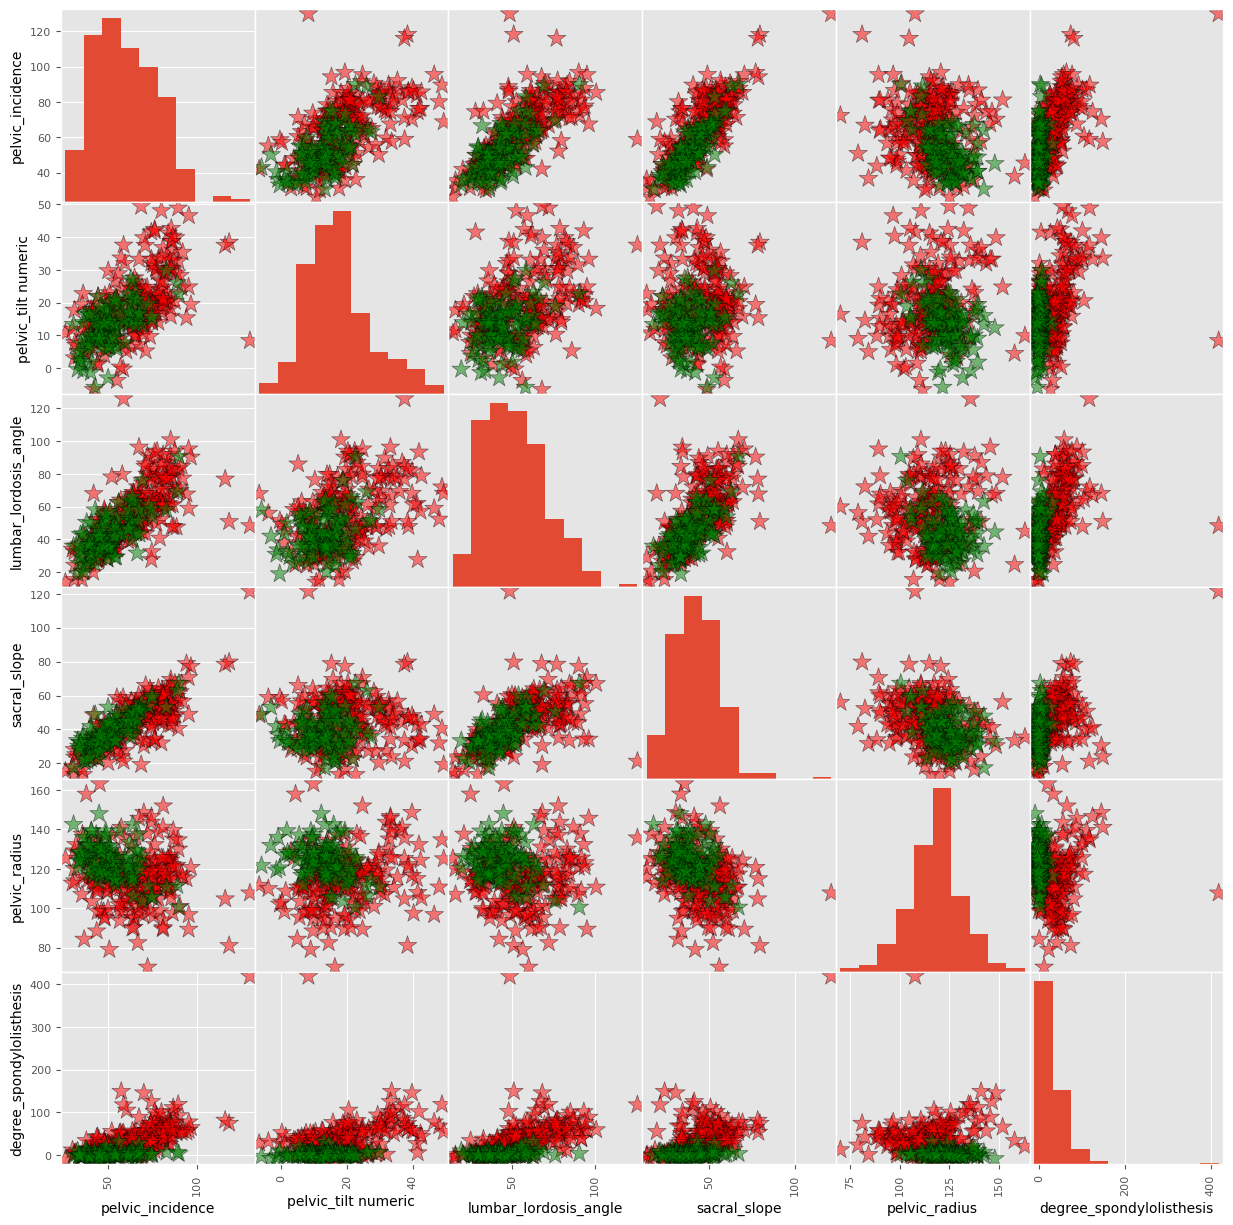

Abnormal    210
Normal      100
Name: class, dtype: int64

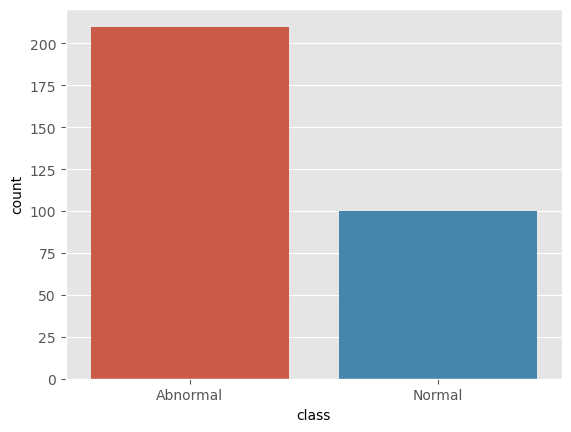

In [7]:
color_list = ['red' if i=='Abnormal' else 'green' for i in data.loc[:,'class']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()

sns.countplot(x="class", data=data)
data.loc[:,'class'].value_counts()


In [8]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
#print('Prediction: {}'.format(prediction))
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

Prediction: ['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Ab

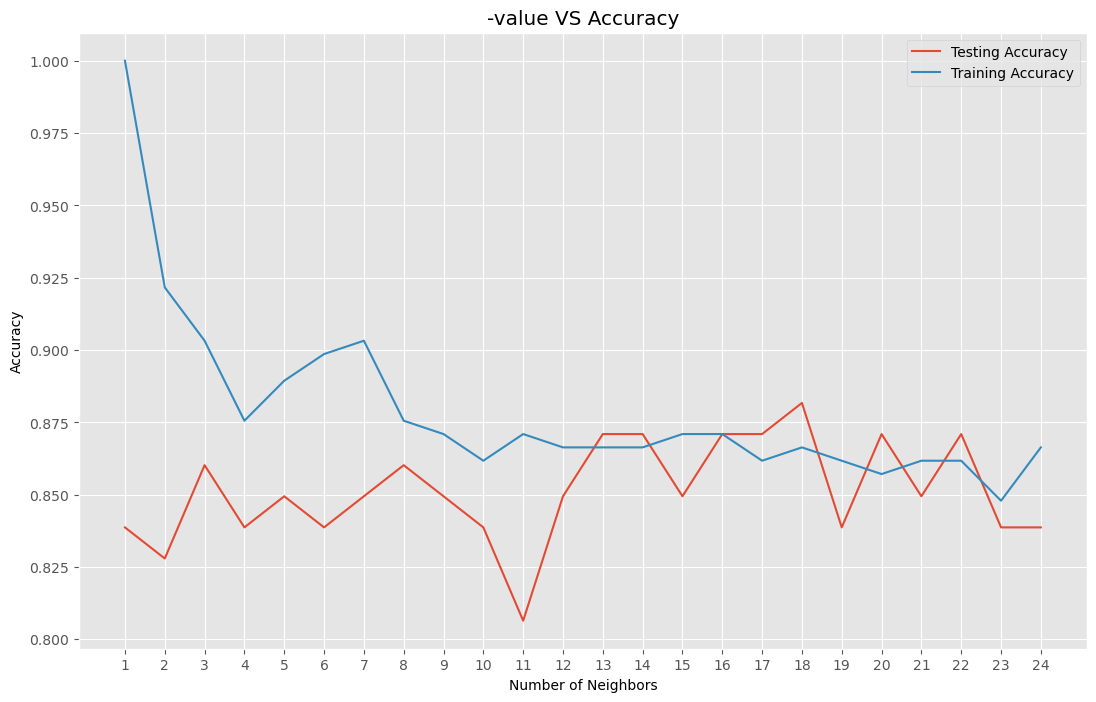

Best accuracy is 0.8817204301075269 with K = 18


In [9]:
# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [10]:
# SVM, pre-process and pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
steps = [('scalar', StandardScaler()),
         ('SVM', SVC())]
pipeline = Pipeline(steps)
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 1)
cv = GridSearchCV(pipeline,param_grid=parameters,cv=3)
cv.fit(x_train,y_train)

y_pred = cv.predict(x_test)

print("Accuracy: {}".format(cv.score(x_test, y_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

NameError: name 'GridSearchCV' is not defined

In [13]:
# Load data
data = pd.read_csv('column_2C_weka.csv')
# get_dummies
df = pd.get_dummies(data)
df.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Abnormal,class_Normal
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1,0
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,1,0
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,1,0
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,1,0
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,1,0
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,1,0


In [14]:
# drop one of the feature
df.drop("class_Normal",axis = 1, inplace = True)
df.head(10)
# instead of two steps we can make it with one step pd.get_dummies(data,drop_first = True)


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Abnormal
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,1
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,1
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,1
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,1
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,1


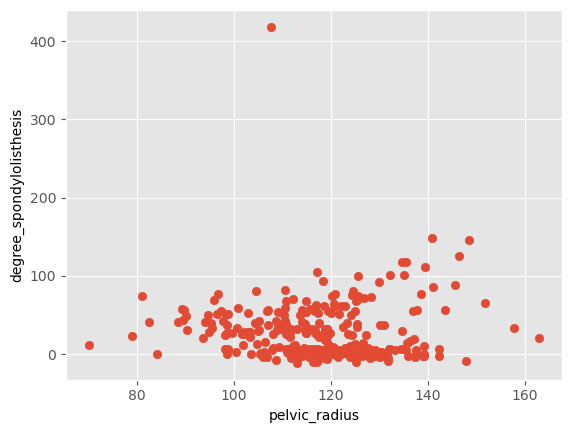

In [15]:
# As you can see there is no labels in data
data = pd.read_csv('column_2C_weka.csv')
plt.scatter(data['pelvic_radius'],data['degree_spondylolisthesis'])
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.show()

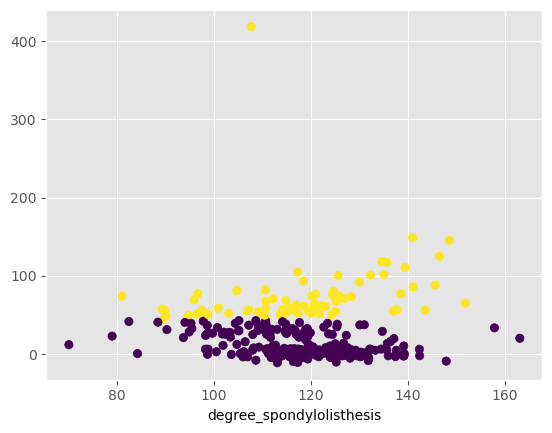

In [16]:
# KMeans Clustering
data2 = data.loc[:,['degree_spondylolisthesis','pelvic_radius']]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data2)
labels = kmeans.predict(data2)
plt.scatter(data['pelvic_radius'],data['degree_spondylolisthesis'],c = labels)
plt.xlabel('pelvic_radius')
plt.xlabel('degree_spondylolisthesis')
plt.show()

In [17]:

# cross tabulation table
df = pd.DataFrame({'labels':labels,"class":data['class']})
ct = pd.crosstab(df['labels'],df['class'])
print(ct)

class   Abnormal  Normal
labels                  
0            138     100
1             72       0


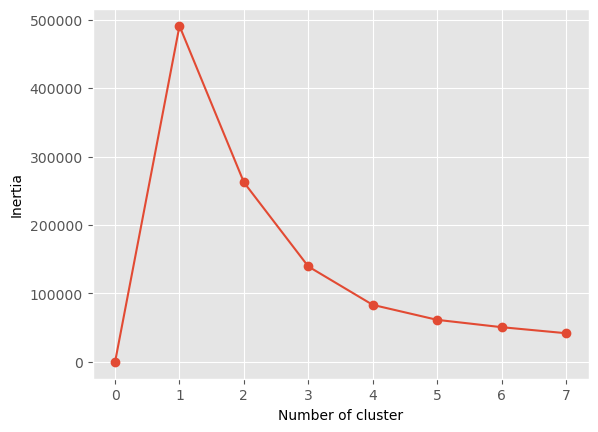

In [18]:
# inertia
inertia_list = np.empty(8)
for i in range(1,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data2)
    inertia_list[i] = kmeans.inertia_
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

In [19]:
data = pd.read_csv('column_2C_weka.csv')
data3 = data.drop('class',axis = 1)

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scalar = StandardScaler()
kmeans = KMeans(n_clusters = 2)
pipe = make_pipeline(scalar,kmeans)
pipe.fit(data3)
labels = pipe.predict(data3)
df = pd.DataFrame({'labels':labels,"class":data['class']})
ct = pd.crosstab(df['labels'],df['class'])
print(ct)

class   Abnormal  Normal
labels                  
0             94      90
1            116      10


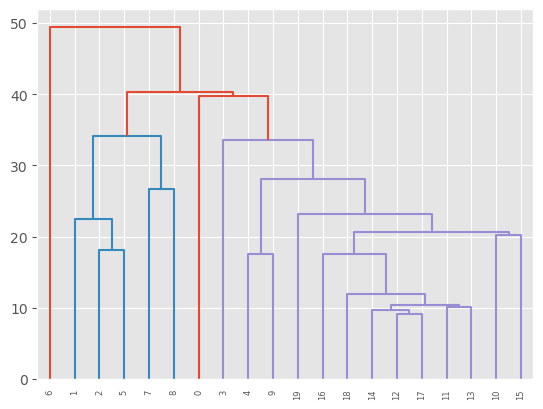

In [12]:
from scipy.cluster.hierarchy import linkage,dendrogram

merg = linkage(data3.iloc[200:220,:],method = 'single')
dendrogram(merg, leaf_rotation = 90, leaf_font_size = 6)
plt.show()